In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_nutricional.head(57)

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,0.00,4.990,2.190,0.520,0.00,0.153900,0.28350,0.000189
1,Leche entera en polvo,11.00,4.510,2.840,2.730,0.00,1.620,0.770,0.060,0.00,0.044440,0.09900,0.000060
2,Yogurt,19.00,2.450,0.510,0.490,0.00,0.320,0.140,0.014,0.00,0.007990,0.01767,0.000005
3,Queso crema,1.66,0.060,0.100,0.370,0.00,0.360,0.110,0.010,0.00,0.001230,0.00093,0.000000
4,Queso cuartirolo,3.66,0.060,0.770,0.800,0.00,0.760,0.210,0.020,0.00,0.020840,0.01654,0.000000
5,Queso rallar,1.66,0.060,0.550,0.450,0.00,0.360,0.110,0.008,0.00,0.020420,0.01578,0.000000
6,Huevo,16.00,0.000,1.920,1.890,0.00,0.510,0.720,0.460,0.00,0.021600,0.00896,0.000400
7,Asado,50.00,0.000,9.300,7.500,0.00,2.930,3.270,0.189,0.00,0.033000,0.00750,0.001120
8,Paleta,15.00,0.000,3.000,1.500,0.00,0.880,0.980,0.056,0.00,0.009900,0.00180,0.000340
9,Hueso c/carne,15.00,0.000,3.000,1.500,0.00,0.880,0.980,0.056,0.00,0.009900,0.00180,0.000340


In [3]:
def eval_oms (a:pd.DataFrame):
    cantidad= a['Cantidad (gr/ml)'].sum()
    hidratosDeCarbono=a['HC (gr)'].sum()*100/cantidad
    proteinas=a['Proteinas (gr)'].sum()*100/cantidad
    grasas=a['Grasas (gr)'].sum()*100/cantidad
    azucaresL=a['Azucares Libres (gr)'].sum()*100/cantidad
    ags=a['AGS (gr)'].sum()*100/cantidad
    agni=a['AGNI (gr)'].sum()*100/cantidad
    agP=a['AG p (gr)'].sum()*100/cantidad
    fibra=a['Fibra (gr)'].sum()
    sodio=a['Na (gr)'].sum()*1000
    calcio=a['Ca (gr)'].sum()*1000
    hierro=a['Fe (gr)'].sum()*1000
    lista_fru_ver=['Acelga', 'Banana', 'Batata', 'Cebolla', 'Mandarina', 'Lechuga', 'Manzana', 'Naranja', 'Papa', 'Pera' , 'Tomate', 'Zanahoria', 'Zapallo' ]
    cantidadFV=a[a['Alimento'].isin(lista_fru_ver)]['Cantidad (gr/ml)'].sum()
    print (hidratosDeCarbono, proteinas,  grasas , azucaresL, ags, fibra, sodio, cantidadFV)
    print (55< hidratosDeCarbono < 75 , 10 < proteinas < 15,  15 < grasas < 30, azucaresL <10, ags <10, fibra >25, 160 < sodio < 240, cantidadFV >= 400)

    return 55< hidratosDeCarbono < 75 and 10 < proteinas < 15 and  15 < grasas < 30 and azucaresL <10 and ags <10 and fibra >25 and 160 < sodio < 240 and cantidadFV >= 400


eval_oms(tabla_nutricional)

21.614409079174063 5.922801730269708 4.05227690637892 2.9900367234466296 1.3794738589124171 21.26 3337.714 634.0
False False False True True False False True


False

In [4]:
def calculoACP_por_fila(df: pd.DataFrame):
    df.drop('Cantidad (gr/ml)', axis='columns')
    nombres = df.iloc[:, 0].values  # Extraer los nombres
    datos = df.iloc[:, 1:].values   # Extraer los datos numéricos
    
    # Centrar los datos por filas
    datos_centrados = datos - np.mean(datos, axis=1, keepdims=True)
    
    # Calcular la matriz de covarianza de los datos centrados transpuestos
    Mcov = np.cov(datos_centrados.T)
    
    # Calcular los valores y vectores propios
    D, V = np.linalg.eigh(Mcov)
    
    # Ordenar los valores y vectores propios en orden descendente
    idx = np.argsort(-D)
    D = D[idx]
    V = V[:, idx]
    
    # Calcular la varianza explicada
    varianza_explicada = D / np.sum(D)
    
    return D, V, datos_centrados, varianza_explicada, nombres

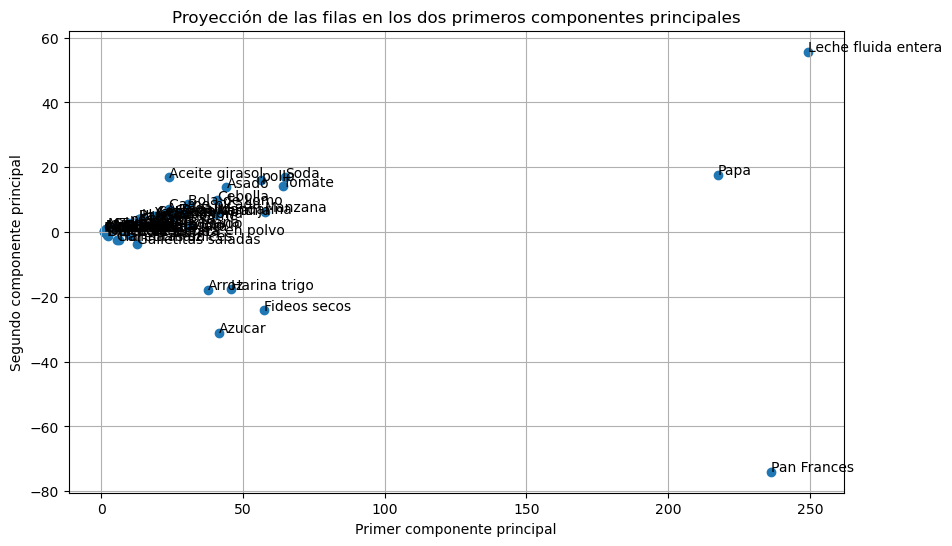

In [5]:
def graficar_componentes_principales(df: pd.DataFrame):
    D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(df)
    
    # Proyectar los datos centrados en los dos primeros componentes principales
    proyecciones = np.dot(datos_centrados, V[:, :2])
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(proyecciones[:, 0], proyecciones[:, 1])
    
    for i, nombre in enumerate(nombres):
        plt.annotate(nombre, (proyecciones[i, 0], proyecciones[i, 1]))
    
    plt.title('Proyección de las filas en los dos primeros componentes principales')
    plt.xlabel('Primer componente principal')
    plt.ylabel('Segundo componente principal')
    plt.grid()
    plt.show()

graficar_componentes_principales(tabla_nutricional)

C:\Users\Ciro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


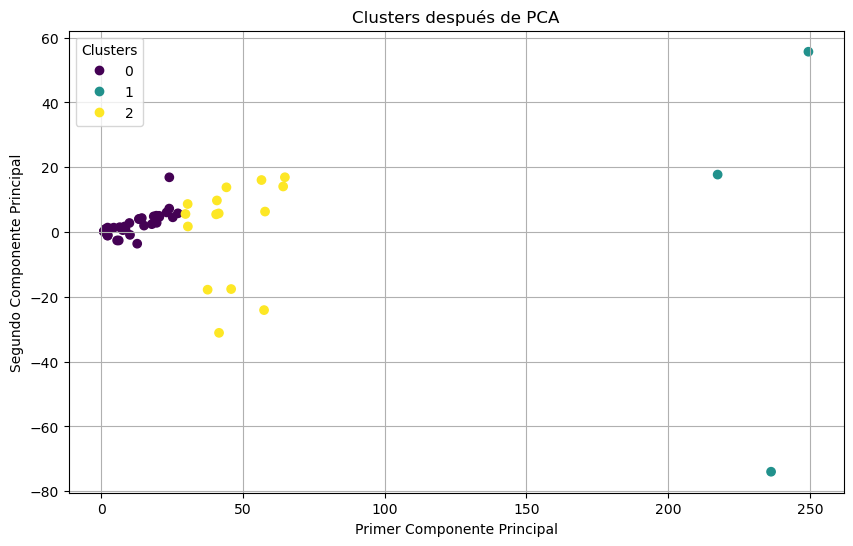

In [5]:
D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(tabla_nutricional)
proyecciones = np.dot(datos_centrados, V[:, :2])
pca_df= pd.DataFrame (proyecciones, columns=['PCA1', 'PCA2'])

# Definir el número de clústeres
n_clusters = 3

# Inicializar y aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(pca_df)

# Añadir los resultados de K-Means al DataFrame
pca_df['Cluster'] = kmeans.labels_
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')

# Añadir leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Clusters después de PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.grid(True)
plt.show()

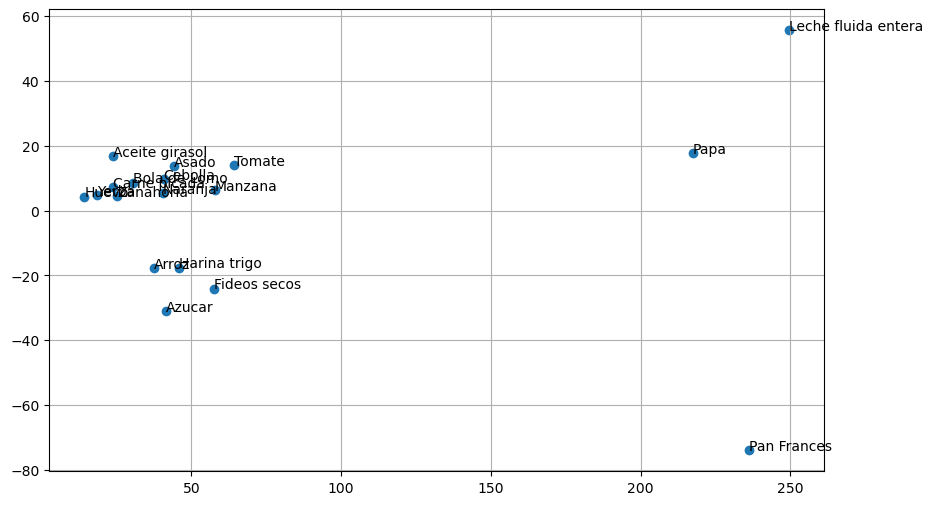

In [8]:
#Aca hice una funcion q hace el PCA sobre todo y despues lo filtra entonces nos da el grafico del analisis grande pero filtrado.
nombres_productos=['Aceite girasol', 'Arroz', 'Asado', 'Azucar', 'Bola de Lomo', 'Carne picada', 'Cebolla', 'Fideos secos', 'Harina trigo', 'Huevo', 'Leche fluida entera', 'Manzana', 'Naranja', 'Paleta', 'Pan Frances', 'Papa', 'Tomate', 'Yerba', 'Zanahoria']
def graficar_componentes_principales_filtrado(df: pd.DataFrame, lista: list):
    D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(df)
    
    # Proyectar los datos centrados en los dos primeros componentes principales
    proyecciones = np.dot(datos_centrados, V[:, :2])
    
    # Filtrar las proyecciones para incluir solo los nombres en la lista
    mask = np.isin(nombres, lista)
    proyecciones_filtradas = proyecciones[mask]
    nombres_filtrados = nombres[mask]
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(proyecciones_filtradas[:, 0], proyecciones_filtradas[:, 1])
    plt.grid()
    
    for i, nombre in enumerate(nombres_filtrados):
        plt.annotate(nombre, (proyecciones_filtradas[i, 0], proyecciones_filtradas[i, 1]))

graficar_componentes_principales_filtrado(tabla_nutricional, nombres_productos)

In [6]:
#Le cambiamos el nombre a los alimentos de la tabla de consumidores libres para que coincidan con los nombres que tienen en la tabla nutricional, para así poder compararlos.

tabla_consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
nombres_productos=['Aceite girasol', 'Arroz', 'Asado', 'Azucar', 'Bola de Lomo', 'Carne picada', 'Cebolla', 'Fideos secos', 'Harina trigo', 'Huevo', 'Leche fluida entera', 'Manzana', 'Naranja', 'Paleta', 'Pan Frances', 'Papa', 'Tomate', 'Yerba', 'Zanahoria']

tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'ACEITE COCINERO GIRASOL': 'Aceite girasol'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'ARROZ GRANO FINO': 'Arroz'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'AZUCAR LEDESMA': 'Azucar'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'FIDEOS GUISEROS': 'Fideos secos'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'HUEVOS COLOR DOCENA': 'Huevo'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'HARINA DE TRIGO': 'Harina trigo'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'PAN FRESCO': 'Pan Frances'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'LECHE c/VIT.FORT': 'Leche fluida entera'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'YERBA TARAGUI': 'Yerba'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'ZANAHORIAS': 'Zanahoria'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'TOMATE PERITA': 'Tomate'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'CEBOLLA': 'Cebolla'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'PAPA NEGRA': 'Papa'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'NARANJA': 'Naranja'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'MANZANA': 'Manzana'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'BOLA DE LOMO': 'Bola de Lomo'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'ASADO	': 'Asado'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'PALETA': 'Paleta'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'CARNE PICADA COMUN': 'Carne picada'})

alimentos_comunes = set(tabla_nutricional['Alimento']).intersection(set(tabla_consumidores_libres['PRODUCTOS']))
print (alimentos_comunes)

{'Huevo', 'Azucar', 'Fideos secos', 'Leche fluida entera', 'Zanahoria', 'Naranja', 'Papa', 'Tomate', 'Pan Frances', 'Bola de Lomo', 'Carne picada', 'Cebolla', 'Harina trigo', 'Arroz', 'Aceite girasol', 'Manzana', 'Yerba'}


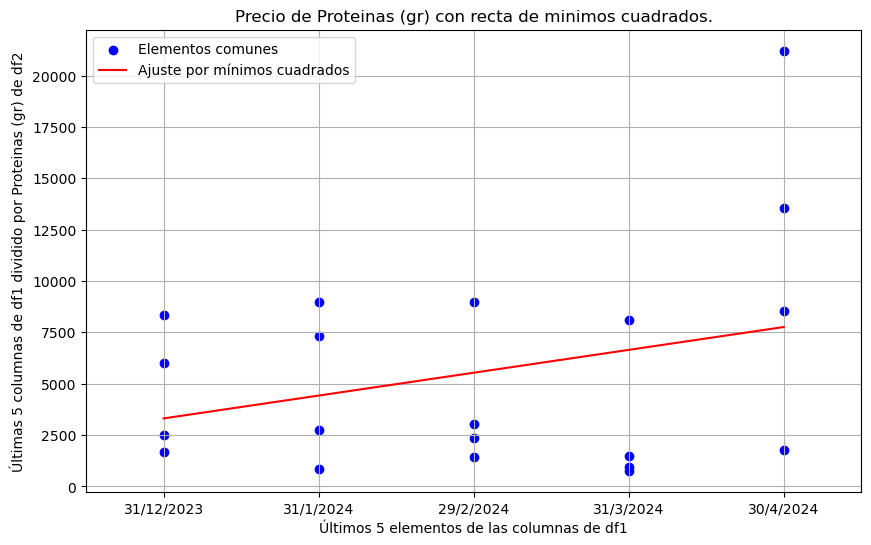

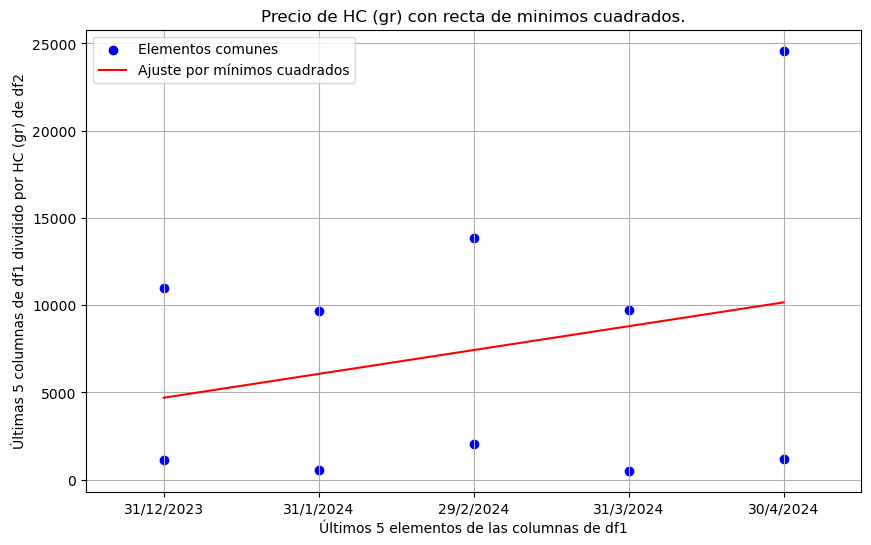

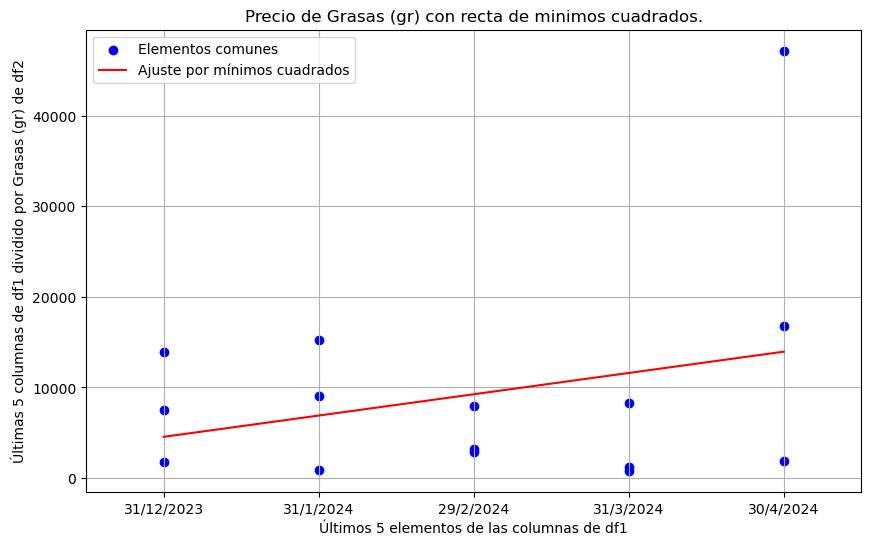

In [20]:
def plot_common_elements_with_fit(df1, df2, column_to_divide):
    
    # Identificar elementos comunes
    common_elements = alimentos_comunes
    
    if len(common_elements) == 0:
        print("No hay elementos comunes entre los DataFrames.")
        return
    
    # Seleccionar los últimos 5 elementos de las columnas del primer DataFrame para el eje X
    x = np.tile(df1.columns[-5:], df1.shape[0])
    
    # Seleccionar los valores correspondientes de las últimas 5 columnas del primer DataFrame para el eje Y
    y = df1.iloc[:, -5:].values.flatten()

    # Dividir los valores de Y por los valores correspondientes de la columna especificada del segundo DataFrame
    divisor = np.tile(df2[column_to_divide].values[:df1.shape[0]], 5)
    divisor = divisor * np.tile(df2['Cantidad (gr/ml)'].values[:df1.shape[0]], 5) / np.tile(df1['Cantidad'].values[:df1.shape[0]], 5)

    
    # Busco divisores que sean lo suficientemente grandes como para no darme valores muy grandes por ser un divisor muy chico.
    divisores_relevantes = divisor > 0.15
    
    # Filtro los valores.
    y = y[divisores_relevantes]
    x = x[divisores_relevantes]
    divisor = divisor[divisores_relevantes]

    
    # Realizar la división solo en los índices no cero
    y = y / divisor

    # Convertir x a valores numéricos para el ajuste
    x_unique = df1.columns[-5:]
    x_numeric = np.array([i for i, col in enumerate(x_unique) for _ in range(df1.shape[0])])
    x_numeric = x_numeric[divisores_relevantes]

    # Normalizar x_numeric y y
    x_numeric_normalized = (x_numeric - np.mean(x_numeric)) / np.std(x_numeric)
    y_normalized = (y - np.mean(y)) / np.std(y)

    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 6))
    plt.scatter(x_numeric, y, color='blue', label='Elementos comunes')
    
    # Calcular la recta por mínimos cuadrados
    A = np.vstack([x_numeric_normalized, np.ones(len(x_numeric_normalized))]).T
    m, c = np.linalg.lstsq(A, y_normalized, rcond=None)[0]
    
    # Desnormalizar los coeficientes
    m = m * np.std(y) / np.std(x_numeric)
    c = c * np.std(y) + np.mean(y) - m * np.mean(x_numeric)

    # Añadir la recta de mínimos cuadrados al gráfico
    plt.plot(x_numeric, m * x_numeric + c, 'r', label='Ajuste por mínimos cuadrados')
    
    # Añadir etiquetas y leyenda
    plt.xlabel('Últimos 5 elementos de las columnas de df1')
    plt.ylabel(f'Últimas 5 columnas de df1 dividido por {column_to_divide} de df2')
    plt.title(f'Precio de {column_to_divide} con recta de minimos cuadrados.')
    plt.xticks(ticks=np.arange(len(x_unique)), labels=x_unique)
    plt.legend()
    plt.grid(True)
    
    # Ajustar los límites del eje X
    plt.xlim(-0.5, len(x_unique) - 0.5)  # Aumentar un poco el límite derecho

    plt.show()


plot_common_elements_with_fit(tabla_consumidores_libres, tabla_nutricional, 'Proteinas (gr)')
plot_common_elements_with_fit(tabla_consumidores_libres, tabla_nutricional, 'HC (gr)')
plot_common_elements_with_fit(tabla_consumidores_libres, tabla_nutricional, 'Grasas (gr)')

In [45]:
tabla_consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
tabla_consumidores_libres['PRODUCTOS'] = tabla_consumidores_libres['PRODUCTOS'].str.lower()
rubros = {
    'Carbohidratos': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco'],
    'Carnes': ['asado', 'bola de lomo', 'carne picada comun', 'paleta'],    
    'Frutas_verduras': ['acelga paquete', 'berenjenas', 'cebolla', 'manzana', 'naranja', 'papa negra', 'tomate perita', 'zanahorias'],
    'Lacteos': ['leche c/vit.fort'],
    'Otros': ['aceite cocinero girasol', 'azucar ledesma', 'huevos color docena', 'yerba taragui']
}

# Inicializa un diccionario para guardar la inflación por rubro
inflacion_por_rubro = {}

# Función para calcular la inflación
def calcular_inflacion(precios):
    return ((precios.iloc[-1] - precios.iloc[0]) / precios.iloc[0]) * 100

# Itera sobre los rubros y calcula la inflación
for rubro, productos in rubros.items():
    inflacion_total = 0
    productos_contados = 0
    for producto in productos:
        if producto in tabla_consumidores_libres['PRODUCTOS'].values:
            precios_producto = tabla_consumidores_libres[tabla_consumidores_libres['PRODUCTOS'] == producto].iloc[0, 2:]
            inflacion_total += calcular_inflacion(precios_producto)
            productos_contados += 1
    if productos_contados > 0:
        inflacion_promedio = inflacion_total / productos_contados
        inflacion_por_rubro[rubro] = inflacion_promedio

# Imprime la inflación por rubro
print(inflacion_por_rubro)

def multiplicar_fila(df, valores_fila, valor_multiplicador):

    # Localizar la fila basada en el valor en la columna 'Alimento' y multiplicar
    for valor in valores_fila:
        df.loc[df['Alimento'] == valor, df.columns != 'Alimento'] *= valor_multiplicador
    return df
carnes = ["Asado", "Paleta", "Bola de Lomo", "Paleta cocida", "Mortadela", "Higado", "pollo", "pescado", "Carne picada", "Hueso c/carne"]
inflacion_carne = inflacion_por_rubro["Carnes"]
tabla_modificada = multiplicar_fila(tabla_nutricional, carnes, (100/(inflacion_carne+100)))
tabla_modificada.head(57)


{'Carbohidratos': 68.89129784688996, 'Carnes': 41.47752635655861, 'Frutas_verduras': 131.8941601542479, 'Lacteos': 80.9090909090909, 'Otros': 55.670870586699735}


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.000000,12.420000,8.370000,7.830000,0.00,4.990000,2.190000,0.520000,0.00,0.153900,0.283500,0.000189
1,Leche entera en polvo,11.000000,4.510000,2.840000,2.730000,0.00,1.620000,0.770000,0.060000,0.00,0.044440,0.099000,0.000060
2,Yogurt,19.000000,2.450000,0.510000,0.490000,0.00,0.320000,0.140000,0.014000,0.00,0.007990,0.017670,0.000005
3,Queso crema,1.660000,0.060000,0.100000,0.370000,0.00,0.360000,0.110000,0.010000,0.00,0.001230,0.000930,0.000000
4,Queso cuartirolo,3.660000,0.060000,0.770000,0.800000,0.00,0.760000,0.210000,0.020000,0.00,0.020840,0.016540,0.000000
5,Queso rallar,1.660000,0.060000,0.550000,0.450000,0.00,0.360000,0.110000,0.008000,0.00,0.020420,0.015780,0.000000
6,Huevo,16.000000,0.000000,1.920000,1.890000,0.00,0.510000,0.720000,0.460000,0.00,0.021600,0.008960,0.000400
7,Asado,35.341302,0.000000,6.573482,5.301195,0.00,2.071000,2.311321,0.133590,0.00,0.023325,0.005301,0.000792
8,Paleta,15.000000,0.000000,3.000000,1.500000,0.00,0.880000,0.980000,0.056000,0.00,0.009900,0.001800,0.000340
9,Hueso c/carne,10.602391,0.000000,2.120478,1.060239,0.00,0.622007,0.692690,0.039582,0.00,0.006998,0.001272,0.000240


In [46]:
eval_oms(tabla_modificada)


22.33579980564441 5.444611320474134 3.9344339405603543 3.0912665184989803 1.269993531815016 21.26 3286.2355847314643 634.0
False False False True True False False True


False

In [40]:
tabla_consumidores_libres.head()

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,aceite cocinero girasol,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,arroz grano fino,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,azucar ledesma,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,fideos guiseros,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,harina de trigo,1000,950.0,1250.0,1350.0,1500.0,1690.0
